In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.utils import save_image
import cv2 as cv
from matplotlib import pyplot as plt

In [ ]:
def Show_Image(Image, Picture_Name):
    plt.imshow(Image)
    plt.title(Picture_Name)
    plt.show()

In [ ]:
def Load_Image(Path):
    img = cv.imread(Path)[:,:,::-1] # [:,:,::-1] переводит BGR в RGB
    return img

Cat_1 = Load_Image('Cat1.jpg')
Cat_2 = Load_Image('Cat2.jpg')

## Изменение размера

Менять размер изображений при передаче их в нейронные сети необходимо в тех случаях, когда вы используете готовые нейросети, а также перенос обучения.

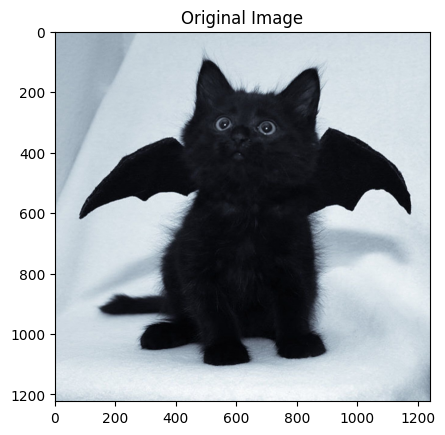

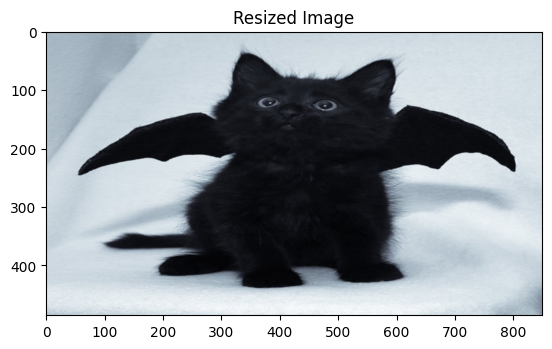

In [ ]:
Resize_Transformation = transforms.Compose([
   transforms.ToPILImage(), # Trandorms работает с PIL
   transforms.Resize(size=(486,850)),
])

Resized_Img = Resize_Transformation(Cat_1)
Show_Image(Cat_1, 'Original Image')
Show_Image(Resized_Img, 'Resized Image')

## Flip - отражение относительно оси

Отражение происходит с вероятностью `p` заданной в параметрах трансформации. При 0 вероятности будет просто исходное изображение. При вероятности 1 - обязательно оражённое.

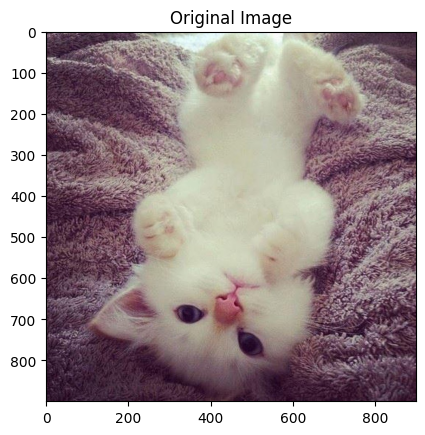

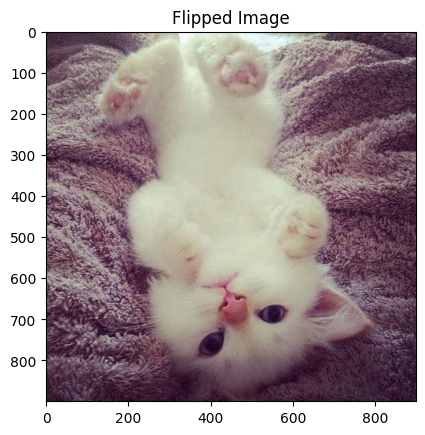

In [ ]:
Horizontal_Flipping_Transformation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p=1)
])

Flipping_Img = Horizontal_Flipping_Transformation(Cat_2)
Show_Image(Cat_2, 'Original Image')
Show_Image(Flipping_Img, 'Flipped Image')

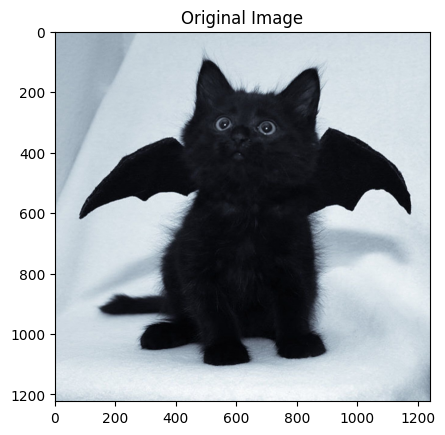

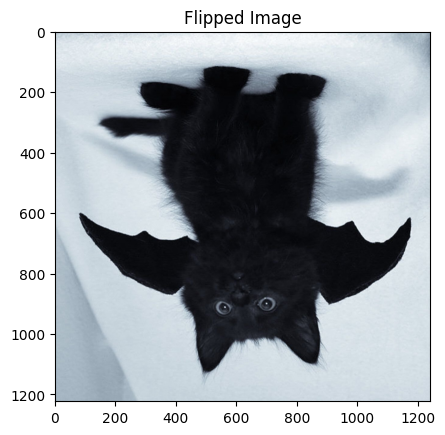

In [ ]:
Vertical_Flipping_Transformation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomVerticalFlip(p=1)
])

Flipping_Img = Vertical_Flipping_Transformation(Cat_1)
Show_Image(Cat_1, 'Original Image')
Show_Image(Flipping_Img, 'Flipped Image')

## Изменение цвета

Случайно изменяет определённые параметры изображения: яркость, контраст, насыщенность и т.п.

Подробности: https://pytorch.org/vision/main/generated/torchvision.transforms.ColorJitter.html

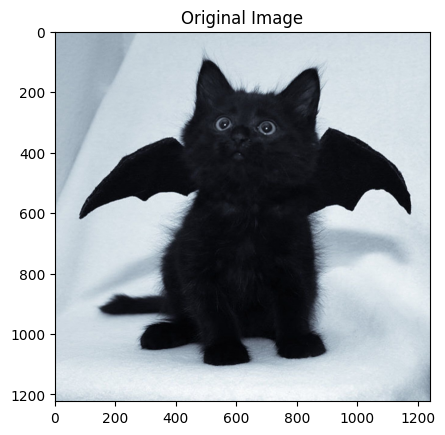

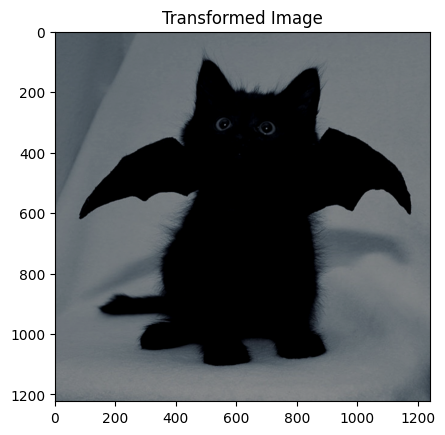

In [ ]:
Color_Transformation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ColorJitter(brightness=(0.1,0.6), contrast=1,saturation=0, hue=0.4)
])

Transformed_Img = Color_Transformation(Cat_1)
Show_Image(Cat_1, 'Original Image')
Show_Image(Transformed_Img, 'Transformed Image')

## Обрезка



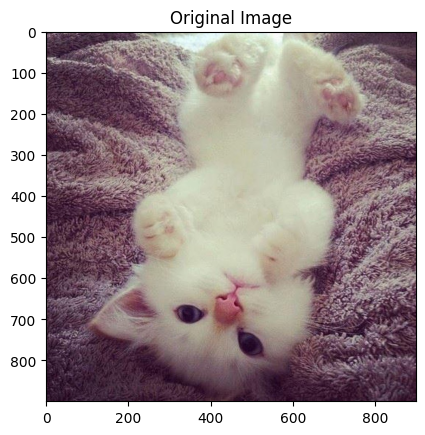

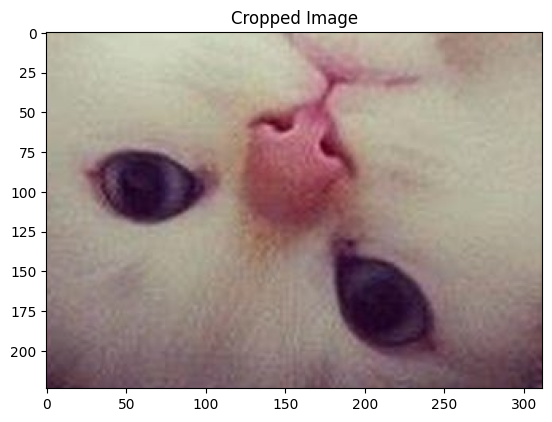

In [ ]:
Crop_Transformation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomCrop(size=(224,312))
])

Cropped_Img = Crop_Transformation(Cat_2)
Show_Image(Cat_2, 'Original Image')
Show_Image(Cropped_Img, 'Cropped Image')

## Повторот

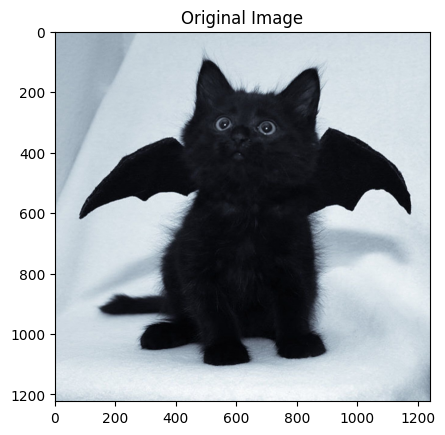

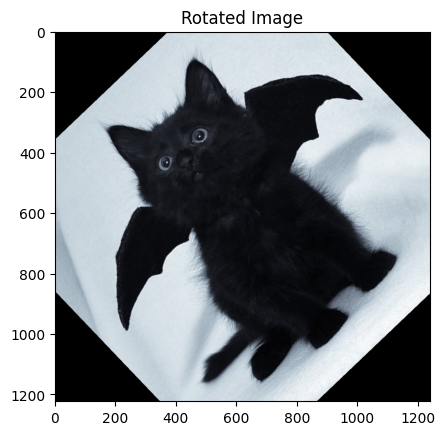

In [ ]:
Rotate_Transformation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(degrees=66)
])

Rotated_Img = Rotate_Transformation(Cat_1)
Show_Image(Cat_1, 'Original Image')
Show_Image(Rotated_Img, 'Rotated Image')

## Нормализация

Вычитаем среднее и делим на стандартное отклонение. Работает только для тензоров.

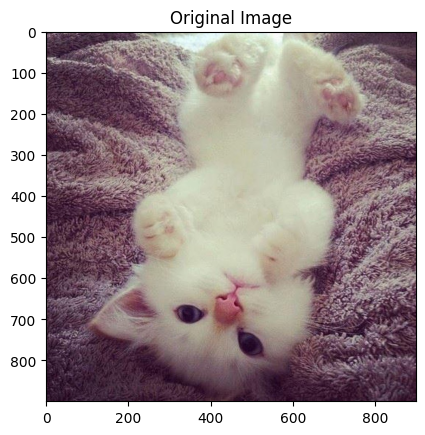

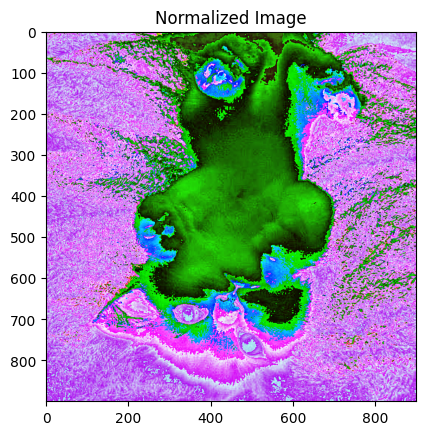

In [ ]:
Normalize_Transformation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[5,0.9,0.6], std=[1.45,0.21,7.12]),
    transforms.ToPILImage()
])

Normalized_Img = Normalize_Transformation(Cat_2)
Show_Image(Cat_2, 'Original Image')
Show_Image(Normalized_Img, 'Normalized Image')